<a href="https://colab.research.google.com/github/divyanshuxpandey/Breast_cancer_analysis/blob/main/Breast_cancer_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

sns.set()
# Check available styles and choose a valid one
print(plt.style.available)
plt.style.use('ggplot') # 'ggplot' is a valid style, did you mean this?

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [175]:
df = pd.read_csv('breast_cancer.csv')

In [180]:
df.head()

,,,,,,,,,,,,,,,,,,,,,,,,,,,569,30,malignant,benign
17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [181]:
# Verify the column names in your DataFrame
print(df.columns)

Index(['569', '30', 'malignant', 'benign'], dtype='object')


In [186]:
#M -> Malignent
#B -> Benign
#Supervised -> target
#Unsupervised -> no
df.describe()

,569,30,malignant,benign
count,569.000000,569.000000,569.000000,569.000000
mean,0.114606,0.290076,0.083946,0.627417
std,0.065732,0.061867,0.018061,0.483918
min,0.000000,0.156500,0.055040,0.000000
25%,0.064930,0.250400,0.071460,0.000000
50%,0.099930,0.282200,0.080040,1.000000
75%,0.161400,0.317900,0.092080,1.000000
max,0.291000,0.663800,0.207500,1.000000


In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 569 entries, (17.99, 10.38, 122.8, 1001.0, 0.1184, 0.2776, 0.3001, 0.1471, 0.2419, 0.07871, 1.095, 0.9053, 8.589, 153.4, 0.006399, 0.04904, 0.05373, 0.01587, 0.03003, 0.006193, 25.38, 17.33, 184.6, 2019.0, 0.1622, 0.6656, 0.7119) to (7.76, 24.54, 47.92, 181.0, 0.05263, 0.04362, 0.0, 0.0, 0.1587, 0.05884, 0.3857, 1.428, 2.548, 19.15, 0.007189, 0.00466, 0.0, 0.0, 0.02676, 0.002783, 9.456, 30.37, 59.16, 268.6, 0.08996, 0.06444, 0.0)
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   569        569 non-null    float64
 1   30         569 non-null    float64
 2   malignant  569 non-null    float64
 3   benign     569 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 592.6 KB


In [157]:
df.isna().sum()

569          0
30           0
malignant    0
benign       0
dtype: int64

<Axes: >

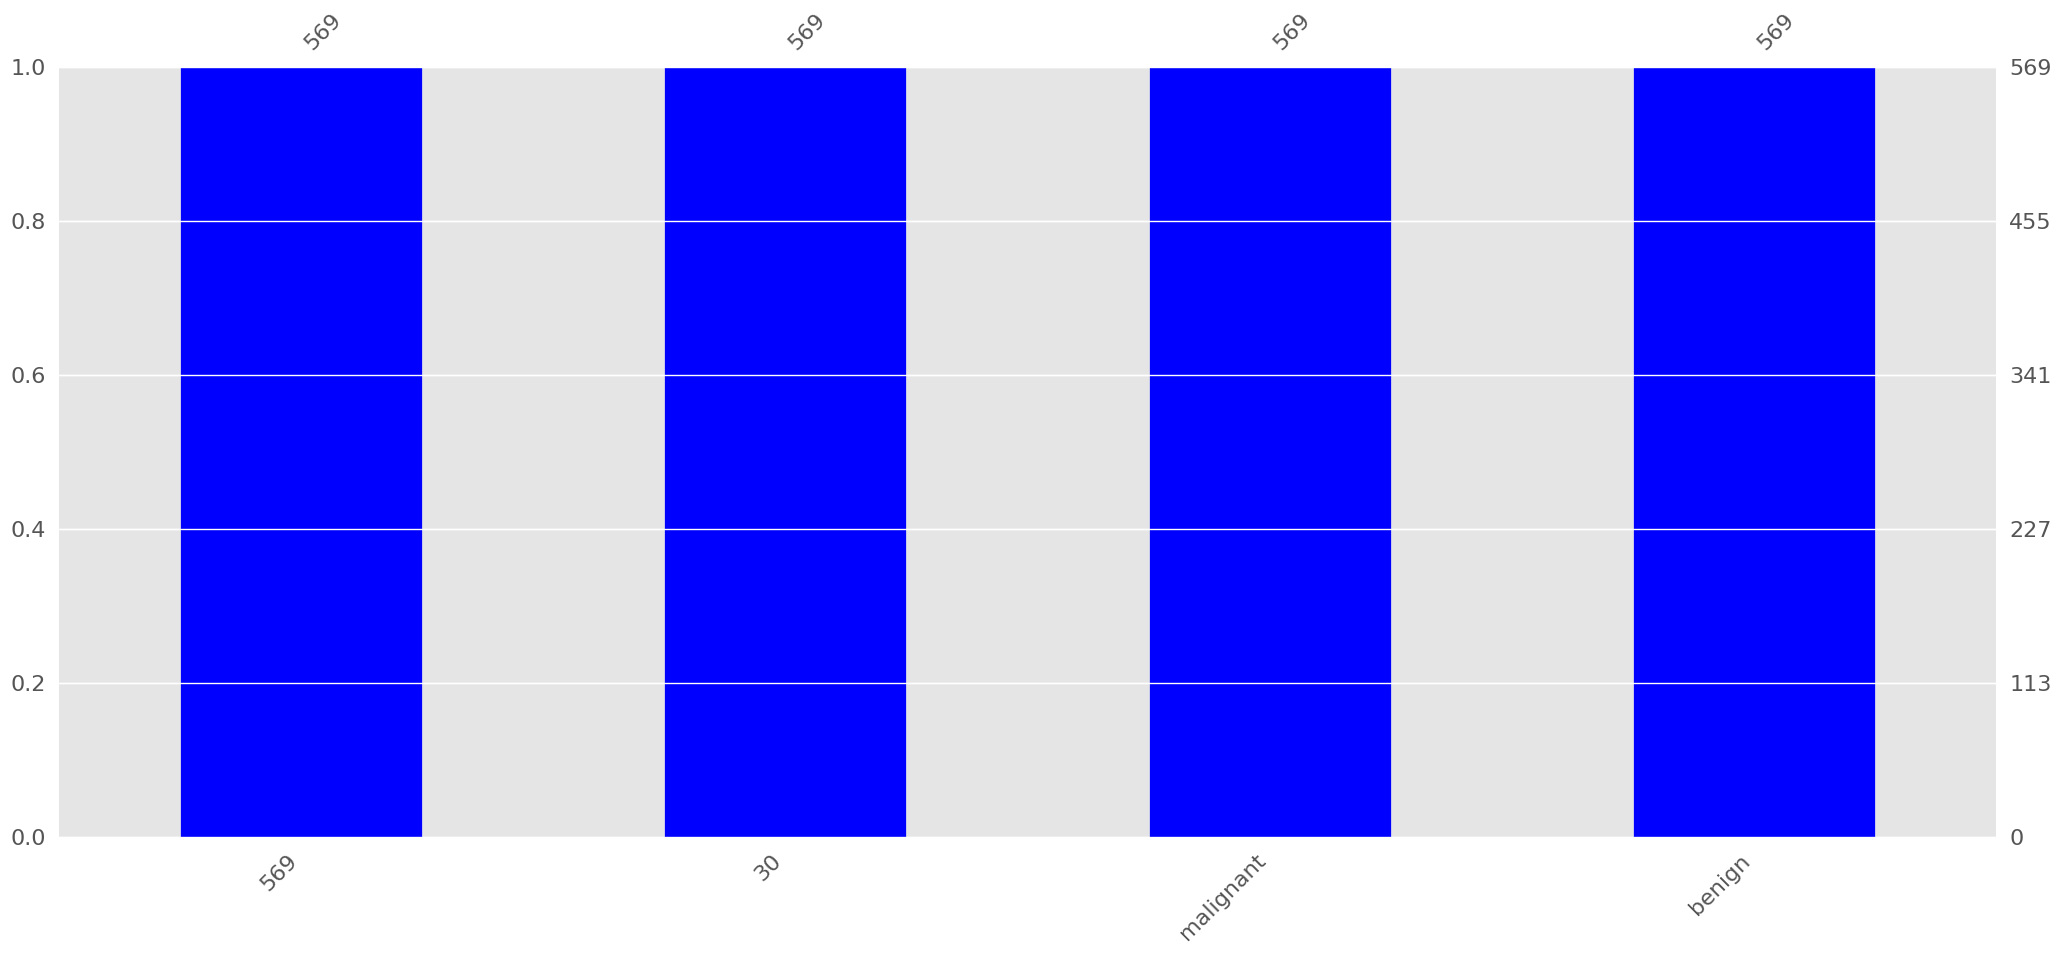

In [158]:
msno.bar(df, color="blue")

In [159]:
# Check the column names in your DataFrame
print(df.columns)

# If 'diagnosis' is not present, check your data loading process.
# If it's misspelled, correct the name in the code below.
if 'diagnosis' in df.columns:
    df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})
else:
    print("Column 'diagnosis' not found in the DataFrame.")

Index(['569', '30', 'malignant', 'benign'], dtype='object')
Column 'diagnosis' not found in the DataFrame.


In [160]:
# Check the column names in your DataFrame
print(df.columns)

# If 'diagnosis' is not present, check your data loading process.
# If it's misspelled, correct the name in the code below.
if 'diagnosis' in df.columns:
    df['diagnosis'] = df['diagnosis'].apply(lambda x: 1 if x == 'M' else 0)
else:
    print("Column 'diagnosis' not found in the DataFrame. Please check your data.")

Index(['569', '30', 'malignant', 'benign'], dtype='object')
Column 'diagnosis' not found in the DataFrame. Please check your data.


Index(['569', '30', 'malignant', 'benign'], dtype='object')


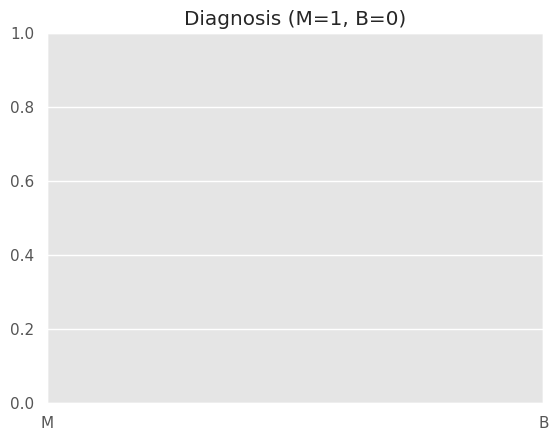

In [161]:
print(df.columns)  # Print the names of all columns in your DataFrame
plt.xticks(np.arange(2), ['M', 'B'])
plt.title('Diagnosis (M=1, B=0)')
plt.show()

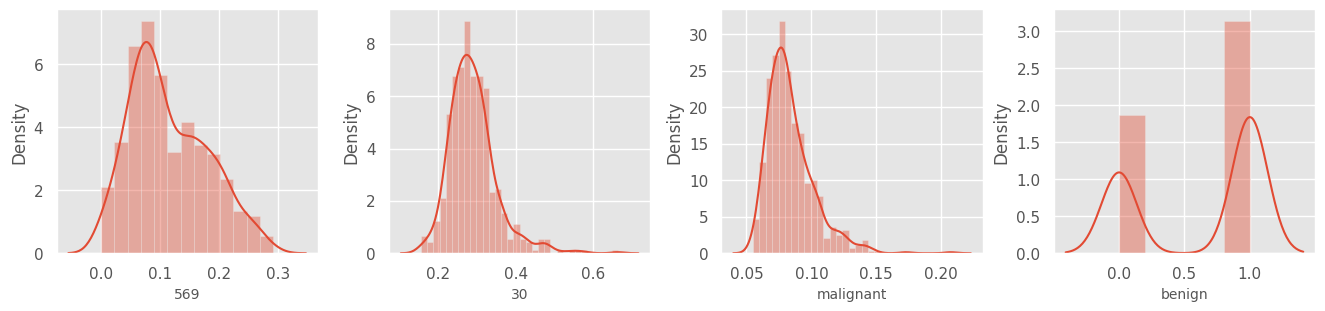

In [162]:
#EDA
#density of graph
plt.figure(figsize=(20,15))
plotnumber = 1  # Initialize plotnumber
for column in df:
  if plotnumber<=30:
    ax= plt.subplot(5,6,plotnumber)
    sns.distplot(df[column])
    plt.xlabel(column,fontsize=10)
    plotnumber+=1

plt.tight_layout()
plt.show()

In [163]:
df.corr()

,569,30,malignant,benign
569,1.000000,0.502528,0.511114,-0.793566
30,0.502528,1.000000,0.537848,-0.416294
malignant,0.511114,0.537848,1.000000,-0.323872
benign,-0.793566,-0.416294,-0.323872,1.000000


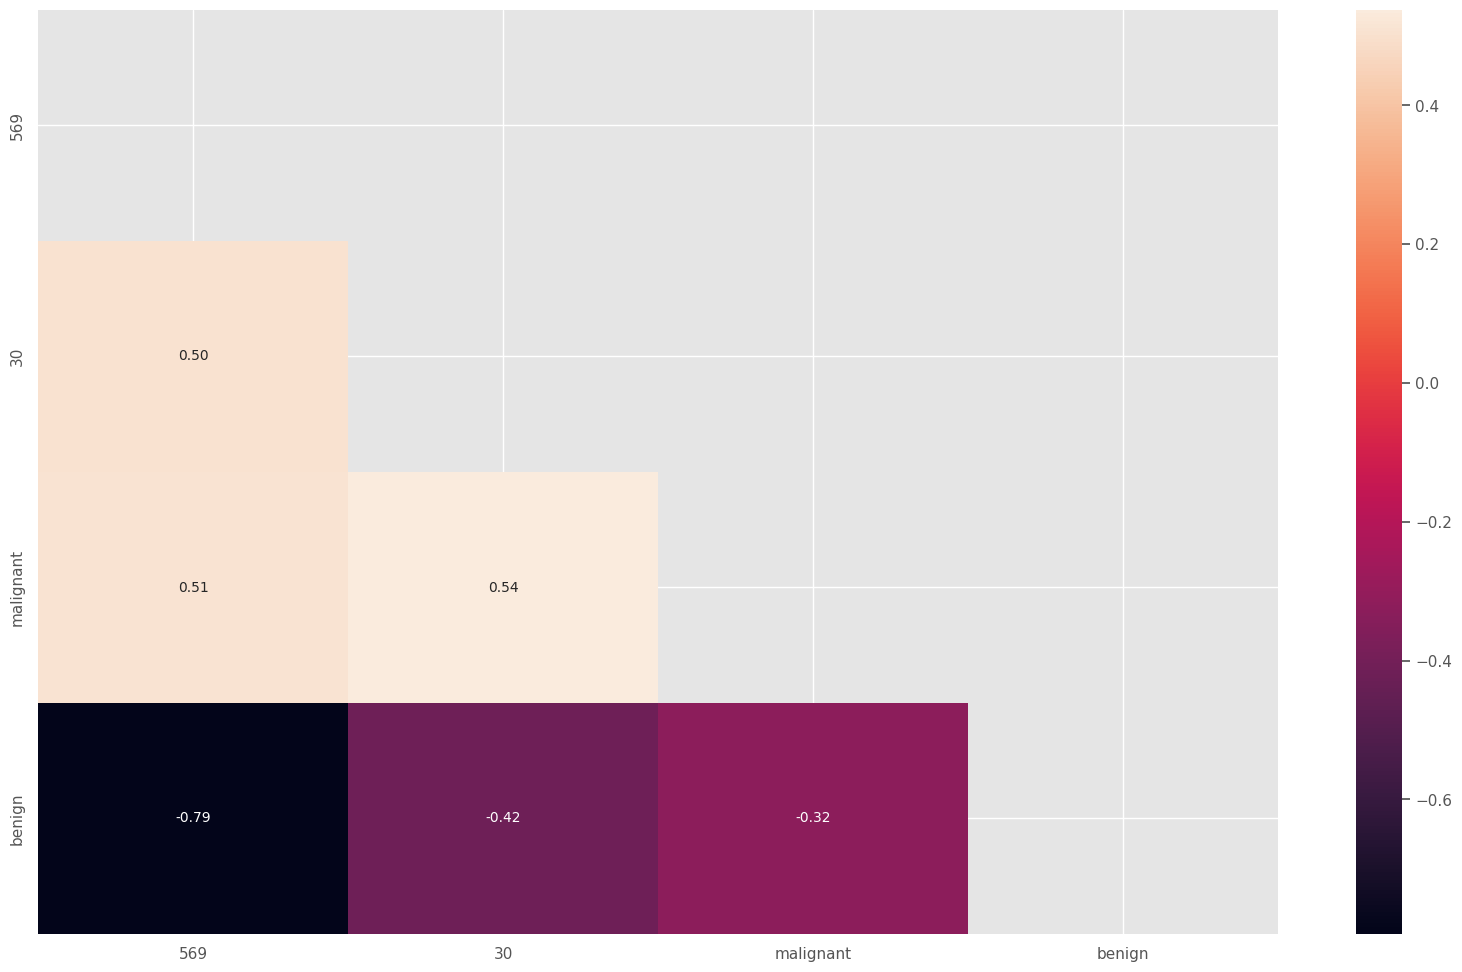

In [164]:
#heatmap
plt.figure(figsize=(20,12))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr(), mask=mask, annot=True, fmt = ".2f")
plt.show()

In [165]:
corr_matrix = df.corr().abs()

corr_matrix = df.corr().abs()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
tri_df = corr_matrix.mask(mask)

to_drop = [x for x in tri_df.columns if any(tri_df[x] > 0.90)] # Iterate over values in column x
df = df.drop(to_drop, axis=1)
print(df.shape[1])

4


In [166]:
df.head()

,,,,,,,,,,,,,,,,,,,,,,,,,,,569,30,malignant,benign
17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [167]:
!pip install scikit-learn==1.2.2

In [168]:
from sklearn.model_selection import train_test_split

X = [[0, 1], [2, 3], [4, 5], [6, 7], [8, 9]]
y = [0, 1, 2, 3, 4]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [169]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#Scaling of the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [170]:
X_train.shape

(4, 2)

In [171]:
#apply machine learning algorithm

In [172]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [173]:
y_pred = log_reg.predict(X_test)
y_pred

array([3])

In [174]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(y_train, log_reg.predict(X_train)))
log_reg_acc = accuracy_score(y_train, log_reg.predict(X_train))


0.5
